# Final Project

# 移除不必要的警告
import warnings
warnings.filterwarnings('ignore')

### 獲取歷史資料

In [1]:
from finlab.data import Data
#from finlab.ml import fundamental_features
#fdf = fundamental_features()

data = Data()

close = data.get("收盤價")
open_ = data.get("開盤價")
high = data.get("最高價")
low = data.get("最低價")
vol = data.get("成交股數")

PB = data.get("股價淨值比")
pe = data.get("本益比")

#bi = data.get("營業利益")


#close = data.get_adj("收盤價").round(2)

#財務指標
rev = data.get("當月營收")
l_rev = data.get("去年當月營收")

#t123 = data.get('土地')

bargin_i=data.get("投信買賣超股數")/data.get("成交股數")
bargin_f=data.get("外資自營商買賣超股數")/data.get("成交股數")
bargin_s=data.get("自營商買賣超股數(自行買賣)")/data.get("成交股數")
#

vol=data.get('成交股數')/1000
vol_ma5=vol.rolling(5).mean()

rev.index = rev.index.shift(5, "d")         #每月頻率
#周頻率

### 計算features

In [2]:
#MFI  = data.talib("MFI")
##MFI.tail()
#ub,mb,lb =data.talib("BBANDS")

#### 營收相關

In [3]:
##############################################　　　自己加入的　　　##############################################
import pandas as pd
from finlab.__init__ import talib_all_stock
from talib import abstract

In [4]:
def bias(n):
    return close / close.rolling(n, min_periods=1).mean()

def acc(n):
    return close.shift(n) / (close.shift(2*n) + close) * 2

def rsv(n):
    l = close.rolling(n, min_periods=1).min() 
    h = close.rolling(n, min_periods=1).max()
    
    return (close - l) / (h - l)

def mom(n):
    return (rev / rev.shift(1)).shift(n)

def yoy(n):
    return (rev.shift(n) / rev.shift(12+n)) -1

def bi(n):
    return bargin_i/bargin_i.rolling(n).mean()

def bf(n):
    return bargin_f/bargin_f.rolling(n).mean()
    
def bs(n):
    return bargin_s/bargin_s.rolling(n).mean()

#-------------------------------------------

features = {
    'mom1': mom(1),
    'mom2': mom(2),
    'mom3': mom(3),
    'mom4': mom(4),
    'mom5': mom(5),
    'mom6': mom(6),
    'mom7': mom(7),
    'mom8': mom(8),
    'mom9': mom(9),

    
    'bias5': bias(5),
    'bias10': bias(10),
    'bias20': bias(20),
    'bias60': bias(60),
    'bias120': bias(120),
    'bias240': bias(240),
    
    'acc5': acc(5),
    'acc10': acc(10),
    'acc20': acc(20),
    'acc60': acc(60),
    'acc120': acc(120),
    'acc240': acc(240),
    
    'rsv5': rsv(5),
    'rsv10': rsv(10),
    'rsv20': rsv(20),
    'rsv60': rsv(60),
    'rsv120': rsv(120),
    'rsv240': rsv(240),
###############################################
    'yoy': yoy(1),
    'delta_yoy':yoy(1)-yoy(2),
    
    'PB':PB,
    'PE':pe,
    
    #'v/ma':vol/vol_ma5,
   #'bi5' : bi(5),
   #'bi10' : bi(10),
   #'bi20' : bi(20),
   #'bi60' : bi(60),
   # 
   #'bf5' : bf(5),
   # #'bf10' : bf(10),
   # #'bf20' : bf(20),
   # #'bf60' : bf(60),
   # 
   # 'bs5' : bs(5),
   # 'bs10' : bs(10),
   # 'bs20' : bs(20),
   # 'bs60' : bs(60),
    
}


In [5]:
yoy(1)

stock_id,1101,1102,1103,1104,1107,1108,1109,1110,1201,1203,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
date,,,,,,,,,,,,,,,,,,,,,
2005-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-15,0.084092,-0.106927,0.019662,0.130446,NaN,0.284005,0.684562,0.124592,0.007105,0.036142,...,0.111964,0.329245,-0.148815,0.393150,1.249940,0.239243,-0.145710,-0.180520,0.116822,0.003516
2022-12-15,0.188504,-0.196042,0.084332,0.136037,NaN,0.449827,-0.201942,0.304901,0.005675,0.212145,...,0.010391,0.178078,-0.673026,0.048772,-0.156177,0.245812,-0.294261,0.004491,0.010218,0.129923
2023-01-15,-0.008009,-0.075633,0.121301,0.066769,NaN,0.431791,-0.143446,0.234091,-0.024680,0.384607,...,-0.037130,0.413395,-0.057254,-0.179187,1.294386,0.322786,-0.276645,0.101934,0.063968,-0.084119


In [6]:
def yoy(n):
    ## if rev.shift(n) < 0:## or (rev.shift(n) < 0):
        return 0
   ## else :
   ##     return (rev.shift(n) / rev.shift(12+n)) -1

In [7]:
#bi(60).dropna(how='all')

#### 財報指標

兩個feature結合[[連結網址]](https://hahow.in/courses/5b9d3a6dca498a001e917383/discussions/5d18b63eac23d80020ae4ce7)

---
```python
from finlab import ml
from finlab.data import Data

data = Data()
rsi = data.talib("RSI")

dataset = ml.fundamental_features()
ml.add_feature(dataset, 'RSI', rsi)
```

In [8]:
from finlab.ml import fundamental_features
dataset_fundamental = fundamental_features()

D:\python上課\finlab_II\finlab\ml.py:49: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  T3900繼續營業部門稅前純益 = T3900繼續營業部門稅前純益[T3900繼續營業部門稅前純益.columns & 收盤價.columns]
D:\python上課\finlab_II\finlab\ml.py:52: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  T3970經常稅後淨利 = T3970經常稅後淨利[T3970經常稅後淨利.columns & 收盤價.columns]
D:\python上課\finlab_II\finlab\ml.py:55: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  T2000權益總計 =  T2000權益總計[T2000權益總計.columns & 收盤價.columns]
D:\python上課\finlab_II\finlab\ml.py:58: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this w

In [9]:
#dataset_fundamental

#### 技術指標

加入其他features
* http://finlabcourse.imotor.com/viewthread.php?tid=660&extra=page%3D1

```python
from finlab import ml
from finlab.data import Data

data = Data()
rsi = data.talib("RSI")

dataset = ml.fundamental_features()
ml.add_feature(dataset, 'RSI', rsi)
```

#### 組合dataset

In [10]:
import pandas as pd

#### 確認各指標清單

In [11]:
#t1 = data.talib("NATR",timeperiod=14)
#t1.to_csv('myfile.csv')

### 製作dataset

##### 設定買賣頻率

In [12]:
#rev.index = rev.index.tz_localize("Asia/Taipei")
every_month = rev.index
every_month

DatetimeIndex(['2005-02-15', '2005-03-15', '2005-04-15', '2005-05-15',
               '2005-06-15', '2005-07-15', '2005-08-15', '2005-09-15',
               '2005-10-15', '2005-11-15',
               ...
               '2022-06-15', '2022-07-15', '2022-08-15', '2022-09-15',
               '2022-10-15', '2022-11-15', '2022-12-15', '2023-01-15',
               '2023-02-15', '2023-03-15'],
              dtype='datetime64[ns]', name='date', length=218, freq=None)

#### 將dataframe 組裝起來

In [13]:
# features['bias20'].reindex(every_month, method='ffill')

for name, f in features.items():
    features[name] = f.reindex(every_month, method='ffill')

In [14]:
for name, f in features.items():
    features[name] = f.unstack()

In [15]:
import pandas as pd
dataset = pd.DataFrame(features)

In [16]:
feature_names = list(dataset.columns)

##### 裝自己要的

In [17]:
from finlab import ml

In [18]:
股本 = data.get('股本合計').reindex(close.index, method='ffill')
市值 = 股本 * close / 10 * 1000
#t1['2330'].dropna()
ml.add_feature(dataset, '市值', 市值)

In [19]:
ml.add_feature(dataset, 'vol_ma5', vol_ma5)

dataset

mom1      mom2      mom3      mom4      mom5  \
stock_id date                                                           
0015     2005-02-15       NaN       NaN       NaN       NaN       NaN   
         2005-03-15       NaN       NaN       NaN       NaN       NaN   
         2005-04-15       NaN       NaN       NaN       NaN       NaN   
         2005-05-15       NaN       NaN       NaN       NaN       NaN   
         2005-06-15       NaN       NaN       NaN       NaN       NaN   
...                       ...       ...       ...       ...       ...   
9962     2022-11-15  0.830797  1.280940  0.641536  1.694666  0.917472   
         2022-12-15  1.163303  0.830797  1.280940  0.641536  1.694666   
         2023-01-15  1.004024  1.163303  0.830797  1.280940  0.641536   
         2023-02-15  1.249495  1.004024  1.163303  0.830797  1.280940   
         2023-03-15  0.729045  1.249495  1.004024  1.163303  0.830797   

                         mom6      mom7      mom8      mom9     bias5  ...  \
stock_id date                                                          ...   
0015     2005-02-15       NaN       NaN       NaN       NaN       NaN  ...   
         2005-03-15       NaN       NaN       NaN       NaN       NaN  ...   
         2005-04-15       NaN       NaN       NaN       NaN       NaN  ...   
         2005-05-15       NaN       NaN       NaN       NaN       NaN  ...   
         2005-06-15       NaN       NaN       NaN       NaN       NaN  ...   
...                       ...       ...       ...       ...       ...  ...   
9962     2022-11-15  0.678559  1.435387  1.209077  0.859901  1.024242  ...   
         2022-12-15  0.917472  0.678559  1.435387  1.209077  1.024939  ...   
         2023-01-15  1.694666  0.917472  0.678559  1.435387  1.004331  ...   
         2023-02-15  0.641536  1.694666  0.917472  0.678559  1.005587  ...   
         2023-03-15  1.280940  0.641536  1.694666  0.917472  1.002268  ...   

                        rsv20    rsv60    rsv120    rsv240       yoy  \
stock_id date                                                          
0015     2005-02-15       NaN      NaN       NaN       NaN       NaN   
         2005-03-15       NaN      NaN       NaN       NaN       NaN   
         2005-04-15       NaN      NaN       NaN       NaN       NaN   
         2005-05-15       NaN      NaN       NaN       NaN       NaN   
         2005-06-15       NaN      NaN       NaN       NaN       NaN   
...                       ...      ...       ...       ...       ...   
9962     2022-11-15  1.000000  1.00000  0.933962  0.440000  0.003516   
         2022-12-15  1.000000  0.98750  0.989899  0.435556  0.129923   
         2023-01-15  0.895833  0.94382  0.957627  0.586667 -0.084119   
         2023-02-15  1.000000  1.00000  1.000000  0.697778  0.568746   
         2023-03-15  0.920000  0.96875  0.978723  0.902222  0.330021   

                     delta_yoy    PB    PE            市值    vol_ma5  
stock_id date                                                        
0015     2005-02-15        NaN   NaN   NaN           NaN        NaN  
         2005-03-15        NaN   NaN   NaN           NaN        NaN  
         2005-04-15        NaN   NaN   NaN           NaN        NaN  
         2005-05-15        NaN   NaN   NaN           NaN        NaN  
         2005-06-15        NaN   NaN   NaN           NaN        NaN  
...                        ...   ...   ...           ...        ...  
9962     2022-11-15  -0.722271  1.33  7.01  1.524723e+09   462.1834  
         2022-12-15   0.126406  1.32  6.99  1.520212e+09   632.1574  
         2023-01-15  -0.214041  1.46  7.70  1.673587e+09  3007.9848  
         2023-02-15   0.652864  1.55  8.22  1.786362e+09   932.8926  
         2023-03-15  -0.238725  1.73  9.17  1.993869e+09   831.0838  

[448644 rows x 33 columns]

In [20]:
##############################################　　　自己加入的　　　##############################################
dataset.index = dataset.index.set_names(['stock_id','date'], level=[0,1])


#dataset.index.levels[1].name = 'date'
#dataset.index.levels[0].name = 'stock_id'

#因為你pandas更新到新版了
## profit.index.levels[0].name = 'year'
## profit.index.levels[1].name = 'month'
#這兩行的語法被棄用，請改成
#profit.index=profit.index.set_names('year', level=0)
#profit.index=profit.index.set_names('month', level=1)
#or profit.index=profit.index.set_names(['year','month'], level=[0,1])
#直接一行
#就可以了

In [21]:
#list(dataset_fundamental.index)

In [22]:
#dataset_fundamental.reindex(dataset.index).dropna()

data[組合](https://hahow.in/courses/5b9d3a6dca498a001e917383/discussions/5d18b63eac23d80020ae4ce7)
```python
new_df = pd.concat([dataset_fundamental['R406_經常利益成長率'],dataset],axis=1).dropna(how='any')
```

In [23]:
new_df = pd.concat([dataset_fundamental,dataset],axis=1).dropna(how='any')
dataset1 = new_df.fillna(method='ffill')#[(new_df.index.get_level_values('stock_id')=='2330')]
#dataset = dataset1

In [24]:
#feature_names=list(dataset1.columns)
#feature_names

### 新增 label(績效/排名)
 - 定義一下要比績效還是要比排名

In [25]:
from finlab import ml

ml.add_profit_prediction(dataset)
ml.add_rank_prediction(dataset)

D:\python上課\finlab_II\finlab\data.py:103: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  all_index = (df.index | item.index).sort_values()
D:\python上課\finlab_II\finlab\data.py:103: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  all_index = (df.index | item.index).sort_values()
D:\python上課\finlab_II\finlab\data.py:103: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  all_index = (df.index | item.index).sort_values()
D:\python上課\finlab_II\finlab\data.py:103: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use 

In [26]:
#profit(return) rank
predi_target = 'rank'

### 刪除太大太小的歷史資料

In [27]:
print(dataset.shape)

def drop_extreme_case(dataset, feature_names, thresh=0.01):
    
    extreme_cases = pd.Series(False, index=dataset.index)
    for f in feature_names:
        tf = dataset[f]
        extreme_cases = extreme_cases | (tf < tf.quantile(thresh)) | (tf > tf.quantile(1-thresh))
    dataset = dataset[~extreme_cases]
    return dataset

dataset_drop_extreme_case = drop_extreme_case(dataset , feature_names , thresh=0.01)

print(dataset_drop_extreme_case.shape)

##(436774, 25)
##(388157, 25)

(448644, 35)
(388315, 35)


In [28]:
dataset_dropna = dataset_drop_extreme_case.dropna(how='any')
dataset_dropna = dataset_dropna.reset_index().set_index("date")

In [29]:
#dataset_drop_extreme_case.index.get_level_values("date")

In [30]:
##################################################################################################################
##############################################　　　自己加入的　　　##############################################
##################################################################################################################

dataset_dropna.index = pd.to_datetime(dataset_dropna.index)
dataset_dropna = dataset_dropna.sort_index()

#修復＜class ‘numpy.ndarray‘＞　https://blog.csdn.net/lxbin/article/details/114005757

## Split Train Test dataset

In [31]:
dataset_train = dataset_dropna.loc[:'2022-03']
dataset_test = dataset_dropna.loc['2022-04':]

#date_arr = dataset.index.get_level_values('date') < '2020'
#dataset_train = dataset[date_arr]
#dataset_test = dataset[~date_arr]

In [32]:
train = dataset_train[feature_names] , dataset_train['return'] > 1.02
test = dataset_test[feature_names] , dataset_test['return'] > 1.00

### 機器學習
 - 目前只有三個，技術指標也要再增加一下feature_names

In [33]:
#feature_names = feature_names1

In [34]:
#dataset_train.index

#### keras

In [35]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers

import os


os.environ['KMP_DUPLICATE_LIB_OK']='True'

model = keras.models.Sequential()
model.add(layers.Dense(100, activation='relu',
                      input_shape=(len(feature_names),),
                      kernel_initializer=initializers.he_normal(seed=0)))
model.add(layers.Dense(100, activation='relu',
                      kernel_initializer=initializers.he_normal(seed=0)))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(1, activation='sigmoid'))


model.summary()

model.compile(loss='mean_squared_error',
              optimizer="adam",)

print('start fitting')
history = model.fit(dataset_train[feature_names], dataset_train[predi_target],
                    batch_size=1000,         #1000  #每一个batch的大小
                    epochs=225, #225          #迭代次数
                    verbose=1,
                    validation_split=0.1,
                    #validation_data =        #(测试集的输入特征，测试集的标签），
                    #validation_split =       # 从测试集中划分多少比例给训练集，
                    #validation_freq = 20        #测试的epoch间隔数                     
                   )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3200      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 13,401
Trainable params: 13,401
Non-trainable params: 0
_________________________________________________________________
start fitting
Epoch 1/225
89/89 [==============================] - 1s 6ms/step - loss: 0.1639 - val_loss: 0.0744
Epoch 2/225
89/89 [==============================] - 0s 4ms/step - loss

##### 結果

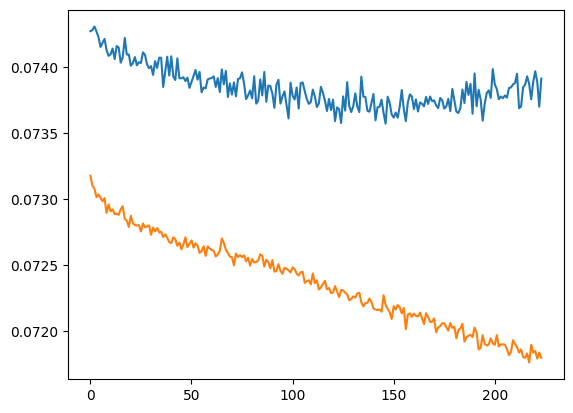

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['val_loss'][1:])
plt.plot(history.history['loss'][1:])

#### lightgbm Model

In [37]:
##############################################　　　自己加入的　　　##############################################
import lightgbm as lgb

cf = lgb.LGBMRegressor(n_estimators=5000)

print('---cf.fit---')
print(cf.fit(*train))
print('---cf.score---')
print(cf.score(*test))
print('---predict---')
print(cf.predict(test[0]))

---cf.fit---
LGBMRegressor(n_estimators=5000)
---cf.score---
-0.15228202458828988
---predict---
[0.18609816 0.25282365 0.34559793 ... 0.35794939 0.40217216 0.11720002]


##### 參數優化_1110

In [38]:
#import lightgbm

fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [test],
            'eval_names': ['valid'],
            'verbose': 100,
            'categorical_feature': 'auto'}

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

#This parameter defines the number of HP points to be tested
n_HP_points_to_test = 100

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMRegressor(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000) #LGBMClassifier
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

In [39]:
gs.fit(*train, **fit_params)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.563924


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.574542


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.55018


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.574884


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.542215


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.57525


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.579224


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.566728


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.540672
[200]	valid's auc: 0.546185


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.577448


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.576232


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.582457


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.577785
[200]	valid's auc: 0.584063


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.570975


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.572097


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.544928


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.572869


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.547691


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.567717


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.553463


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.571683


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.534338


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.57299


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.544063


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.572978


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.547631


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.579978


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.56463


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.551072
[200]	valid's auc: 0.555499


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.576173
[200]	valid's auc: 0.583735


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.578349


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.564745


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.583718


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.579112


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.566338


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.573447


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.575839


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.57259


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.581055


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.579317


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.575656
[200]	valid's auc: 0.583684


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.546198


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.56071
[200]	valid's auc: 0.568131
[300]	valid's auc: 0.572753


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.543249


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.585281


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.578589


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.572393
[200]	valid's auc: 0.579692


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.547572


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.578915


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.57955


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.565876


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.552265


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.577805
[200]	valid's auc: 0.581684


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.540974


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.576437


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.545735


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.582603


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.538552


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.581466


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.577741


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.536849


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.581178


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.570633


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.546107


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.545894


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.575521


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.537169


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.578513
[200]	valid's auc: 0.581974


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.545934


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.577172


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.56912


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.546118


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.569336


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.545315


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.577807
[200]	valid's auc: 0.584582


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.542573


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.566469


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.576834


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.580092


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.580723


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.574441
[200]	valid's auc: 0.582314


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.547744


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.580363


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.578461
[200]	valid's auc: 0.583428


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.578572


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.58279


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.574484


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.539371


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.574096


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.580959


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.572957


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.579938


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.580024


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.580721


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.58019


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.581984


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.538487


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.536226


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.572511


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.561181
[200]	valid's auc: 0.568071


C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

RandomizedSearchCV(cv=3,
                   estimator=LGBMRegressor(metric='None', n_estimators=5000,
                                           n_jobs=4, random_state=314,
                                           silent=True),
                   n_iter=100,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000157A89838B0>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000157A8983D...
                                        'min_child_weight': [1e-05, 0.001, 0.01,
                                                             0.1, 1, 10.0,
                                                             100.0, 1000.0,
                                                             10000.0],
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000157A80D33A0>,
     

In [40]:
print(gs.best_score_)
gs.best_estimator_

0.5695737604749872


LGBMRegressor(colsample_bytree=0.9904687599207201, metric='None',
              min_child_samples=468, min_child_weight=0.1, n_estimators=5000,
              n_jobs=4, num_leaves=42, random_state=314, reg_alpha=0,
              reg_lambda=100, silent=True, subsample=0.849377423799113)

In [41]:
#
#gs.best_estimator_
#LGBMClassifier(colsample_bytree=0.6433117836032942, metric='None',
#               min_child_samples=224, min_child_weight=1e-05, n_estimators=5000,
#               n_jobs=4, num_leaves=20, random_state=314, reg_alpha=10,
#               reg_lambda=10, subsample=0.8945613420997809)

In [42]:
##cf = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None,
##               colsample_bytree=0.4467801334566121, importance_type='split',
##               learning_rate=0.1, max_depth=-1, metric='None',
##               min_child_samples=107, min_child_weight=1, min_split_gain=0.0,
##               n_estimators=5000, n_jobs=4, num_leaves=43, objective=None,
##               random_state=314, reg_alpha=10, reg_lambda=100, silent=True,
##               subsample=0.40294551048668437, subsample_for_bin=200000,
##               subsample_freq=0)
##
##
##cf.fit(dataset_train[feature_names],dataset_train['return'] > 1.05, **fit_params)
##cf.score(dataset_test[feature_names],dataset_test['return'] > 1.05)
##下面那行調整中

In [43]:
##原本的上面那行
cf = lgb.LGBMRegressor(boosting_type='gbdt', class_weight=None,
                       colsample_bytree=0.541999392404749, importance_type='split',
                       learning_rate=0.1, max_depth=-1, metric='None',
                       min_child_samples=430, min_child_weight=10.0, min_split_gain=0.0,
                       n_estimators=5000, n_jobs=4, num_leaves=44, objective=None,
                       random_state=314, reg_alpha=1, reg_lambda=100, silent=True,
                       subsample=0.7653033041096617, subsample_for_bin=200000,
                       subsample_freq=0)

cf.fit(dataset_train[feature_names],dataset_train['return'] > 1.0, **fit_params)
cf.score(dataset_test[feature_names],dataset_test['return'] > 1.0)

C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\orang\.conda\envs\finlab_N\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is depr

[100]	valid's auc: 0.579172


0.01698032161979579

In [44]:
cf.feature_importances_

array([130, 124, 108, 114, 141, 112, 129, 111, 122, 111,  49, 114, 131,
       126, 115, 115, 125, 127, 146, 114,  81,  60,  56,  92,  69,  67,
       110,  87,  76,  78,  85])

<Axes: xlabel='Value', ylabel='Feature'>

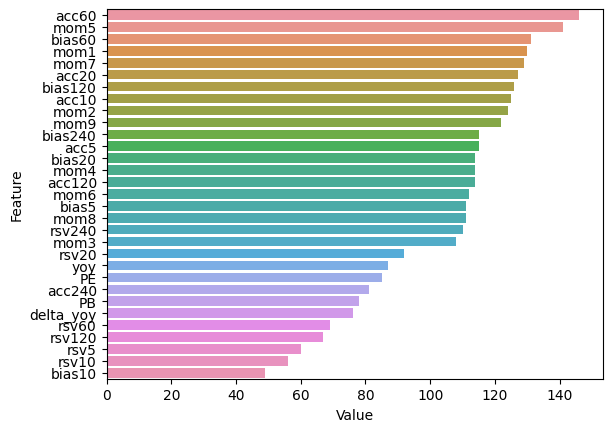

In [45]:
feature_imp = pd.DataFrame(zip(cf.feature_importances_, feature_names), 
                           columns=['Value','Feature']).sort_values('Value', ascending=False)
feature_imp

%matplotlib inline
import seaborn as sns
sns.barplot(x="Value", y="Feature", data=feature_imp)

In [46]:
#print(cf.fit(*train))

In [47]:
#import lightgbm as lgb
#gbm = lgb.LGBMClassifier(n_estimators=100, random_state=5, learning_rate=0.01)
#gbm.fit(dataset_train[feature_names], dataset_train['return'] > 1)

In [48]:
#import tqdm
#
#n = 3
#
#X = []
#y = []
#indexes = []
#dataset_scaled_x = dataset_scaled[feature_names]
#
#for i in tqdm.tqdm_notebook(range(0, len(dataset_scaled)-n)):
#    X.append(dataset_scaled_x.iloc[i:i+n].values)
#    y.append(dataset_scaled['return'].iloc[i+n-1])
#    indexes.append(dataset_scaled.index[i+n-1])
##dataset_scaled.head()

In [49]:
#import numpy as np
#X = np.array(X)
#y = np.array(y)

In [50]:
##import lightgbm as lgb
#cf = lgb.LGBMRegressor(colsample_bytree=0.7740467183023685, metric='None',
#               min_child_samples=395, min_child_weight=0.01, n_estimators=5000,
#               n_jobs=4, num_leaves=9, random_state=314, reg_alpha=5,
#               reg_lambda=10, subsample=0.4643892520208455)
#    
#cf.fit(dataset_train[feature_names].astype(float), dataset_train['rank'])

#### Random Forest Model

In [51]:
from sklearn.ensemble import RandomForestRegressor

cf2 = RandomForestRegressor(n_estimators=100)
cf2.fit(dataset_train[feature_names].astype(float), dataset_train[predi_target])  

RandomForestRegressor()

##### 參數優化_1110

In [52]:
#from scipy.stats import randint as sp_randint 
#from sklearn.model_selection import RandomizedSearchCV 
## build a classifier 
#cf2 = RandomForestRegressor(n_estimators=100) 
## specify parameters and distributions to sample from 
#param_dist = {"max_depth": [3, None], 
#              "max_features": sp_randint(1, 11), 
#              "min_samples_split": sp_randint(2, 11), 
#              "min_samples_leaf": sp_randint(1, 11), 
#              "bootstrap": [True, False], 
#              "criterion": ["mse", "mae"]} 
## run randomized search 
#n_iter_search = 20 
#rs = RandomizedSearchCV(cf2, param_distributions=param_dist, 
#                                   n_iter=n_iter_search) 

In [53]:
#rs.fit(dataset_train[features], dataset_train['return'] >1)

##### Split Train Test dataset

<Axes: xlabel='Value', ylabel='Feature'>

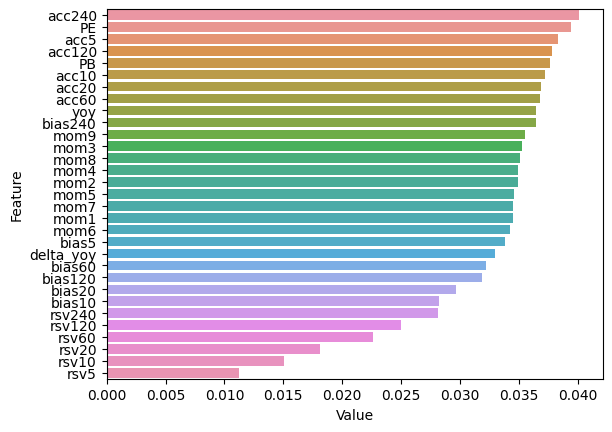

In [54]:
feature_imp = pd.DataFrame(zip(cf2.feature_importances_, feature_names), 
                           columns=['Value','Feature']).sort_values('Value', ascending=False)
feature_imp

%matplotlib inline
import seaborn as sns
sns.barplot(x="Value", y="Feature", data=feature_imp)

In [55]:
select = dataset.index.get_level_values('date') < '2022-03'
dataset_train = dataset[select]
dataset_test = dataset[~select]

### Ensemble learning

In [56]:
dataset_drop = dataset.dropna(subset=feature_names+['return'])

vals = model.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result1'] = pd.Series(vals.swapaxes(0,1)[0], dataset_drop.index)

vals = cf.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result2'] = pd.Series(vals, dataset_drop.index)

vals = cf2.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result3'] = pd.Series(vals, dataset_drop.index)

dataset_drop = dataset_drop.reset_index().set_index("date")

5144/5144 [==============================] - 4s 847us/step


C:\Users\orang\AppData\Local\Temp\ipykernel_3128\1897713111.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_drop['result1'] = pd.Series(vals.swapaxes(0,1)[0], dataset_drop.index)
C:\Users\orang\AppData\Local\Temp\ipykernel_3128\1897713111.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_drop['result2'] = pd.Series(vals, dataset_drop.index)
C:\Users\orang\AppData\Local\Temp\ipykernel_3128\1897713111.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

## backtest

## 把量加進來做篩選
 * https://hahow.in/courses/5b9d3a6dca498a001e917383/shapeussions/60c96f5b018697e8a6131cbc

In [57]:
#把量加進來
vol=data.get('成交股數')/1000
vol_ma5=vol.rolling(5).mean()

vol_filter=vol_ma5>1000
vol_filter=vol_filter[vol_filter].fillna(0)
#vol_filter
t1 = vol_filter

In [58]:
#condition2

In [59]:
vol_filter = t1.reindex(every_month, method='ffill')#.loc['2010-02-15']
#vol_filter.loc['2010-02-15']

In [60]:
#t1 = vol_ma5.iloc[-1].dropna()
#t1.to_csv('./tmp/132.csv')
#t1.hist(bins=10)

In [61]:
#市值
#t1 = (predi_target >= predi_target.nlargest(20).iloc[-1]) * condition_Filter_v2.astype(float)()

100%|██████████████████████████████████████████████████████████████| 158/158 [01:22<00:00,  1.92it/s]


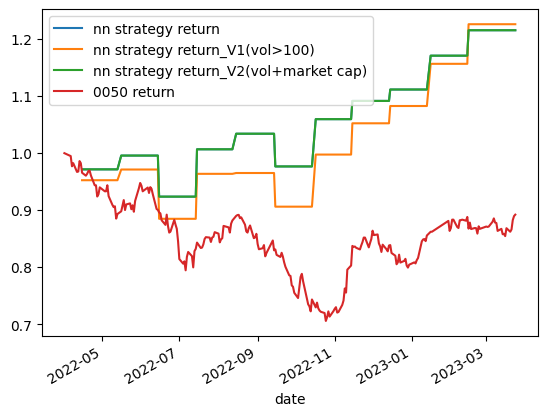

In [62]:
import math
from tqdm import tqdm

vol = 100
test_period = '2022-04'

dates = sorted(list(set(dataset_drop.index)))

rs = []
rs_v1 = []
rs_v2 = []
rs_v3 = []

for d in tqdm(dates):
    #print(d)
    dataset_time = dataset_drop.loc[d]
    
    dataset_time = drop_extreme_case(dataset_time , feature_names , thresh=0.01)
    
    #print(dataset_time)
    
    predi_target = dataset_time['result1'] + dataset_time['result2'] + dataset_time['result3'] 
    
    #predi_target = predi_target * (dataset_time['vol_ma5'] >vol).astype(float)
            ###

    
    condition1 = dataset_time['vol_ma5'] > vol
    condition_Filter_v1 = condition1
    predi_target_v1 = predi_target * condition_Filter_v1.astype(float)
    
    condition2 = (1e10 < dataset_time['市值']) < 1e11
    
    condition_Filter_v2 =  condition1 + condition2
    predi_target_v2 = predi_target * condition_Filter_v2.astype(float)
    
    condition_P = (predi_target >= predi_target.nlargest(20).iloc[-1])
    condition_v1 = (predi_target_v1 >= predi_target_v1.nlargest(20).iloc[-1])
    condition_v2 = (predi_target_v2 >= predi_target_v2.nlargest(20).iloc[-1])
    
    predi_target = predi_target * (dataset_time['vol_ma5'] >vol).astype(float)
    condition_v3 = (predi_target >= predi_target.nlargest(20).iloc[-1]) & condition_Filter_v2 #.astype(float)
    
    #print(vol_filter.loc[d])
    #print(condition)
    
    r = dataset_time['return'][condition_P].mean()
    rs.append(r * (1-3/1000-1.425/1000*2*0.6))
    
    r_v1 = dataset_time['return'][condition_v1].mean()
    rs_v1.append(r_v1 * (1-3/1000-1.425/1000*2*0.6))    
    
    r_v2 = dataset_time['return'][condition_v2].mean()
    rs_v2.append(r_v2 * (1-3/1000-1.425/1000*2*0.6))    

    r_v3 = dataset_time['return'][condition_v3].mean()
    rs_v3.append(r_v3 * (1-3/1000-1.425/1000*2*0.6))    
        
rs = pd.Series(rs, index=dates)[test_period:].cumprod()
rs_v1 = pd.Series(rs_v1, index=dates)[test_period:].cumprod() #*
rs_v2 = pd.Series(rs_v2, index=dates)[test_period:].cumprod() #*
rs_v3 = pd.Series(rs_v3, index=dates)[test_period:].cumprod() #*

s0050 = close['0050'][test_period:]

pd.DataFrame({'nn strategy return':rs.reindex(s0050.index, method='ffill'),
              'nn strategy return_V1(vol>100)':rs_v1.reindex(s0050.index, method='ffill'),
              'nn strategy return_V2(vol+market cap)':rs_v2.reindex(s0050.index, method='ffill'),
              #'nn strategy return_V3(vol+market cap)':rs_v3.reindex(s0050.index, method='ffill'),
              '0050 return':s0050/s0050[0]}).plot()



import winsound
frequency = 2000
duration = 100
winsound.Beep(frequency, duration)

In [63]:
#import pickle
#
#return_history_1026 = pd.Series(rs, index=dates)['2021':].cumprod()
##eq = (gain[hold == 1].mean(axis=1)).fillna(1).cumprod()
#
#pickle.dump(rs, open('return_history_1026.pkl', 'wb'))

In [64]:
#import pyfolio as pf
#import pandas as pd
#
#close.index = close.index.tz_localize("Asia/Taipei")
##pf.create_returns_tear_sheet(close['0050'].pct_change())
#
## 得到 上一個單元的 回測結果
#ret = pickle.load(open("return_history_1026.pkl", "rb"))
#
## 將回測報酬率取出來
#ret = ret.pct_change().dropna()
#ret.index = pd.to_datetime(ret.index).tz_localize('Asia/Taipei')
#
## 利用pyfolio 比較報酬率
#pf.create_returns_tear_sheet(ret, benchmark_rets=close['0050'].pct_change())

### 當月持股狀況

35/35 [==============================] - 0s 868us/step


C:\Users\orang\AppData\Local\Temp\ipykernel_3128\3554755312.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_dataset['result1'] = pd.Series(vals.swapaxes(0,1)[0], last_dataset.index)
C:\Users\orang\AppData\Local\Temp\ipykernel_3128\3554755312.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_dataset['result2'] = pd.Series(vals, last_dataset.index)
C:\Users\orang\AppData\Local\Temp\ipykernel_3128\3554755312.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

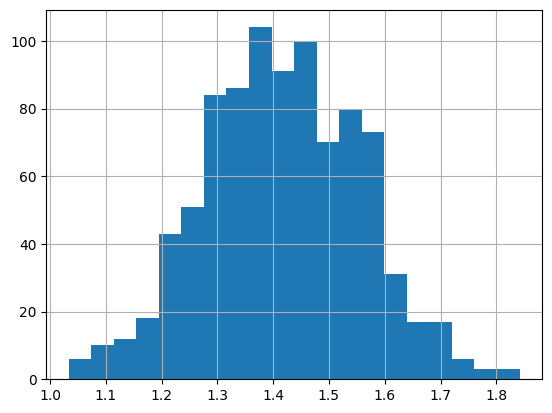

In [65]:
# get the latest dataset
last_date = dataset.index.levels[1].max()#"2022-10-15"
is_last_date = dataset.index.get_level_values('date') == last_date
last_dataset = dataset[is_last_date].copy()


last_dataset = drop_extreme_case(last_dataset, feature_names , thresh=0.01)
t1 = last_dataset

# remove NaN testcases
last_dataset = last_dataset.dropna(subset=feature_names)

# predict

vals = model.predict(last_dataset[feature_names].astype(float))
last_dataset['result1'] = pd.Series(vals.swapaxes(0,1)[0], last_dataset.index)

vals = cf.predict(last_dataset[feature_names].astype(float))
last_dataset['result2'] = pd.Series(vals, last_dataset.index)

vals = cf2.predict(last_dataset[feature_names].astype(float))
last_dataset['result3'] = pd.Series(vals, last_dataset.index)


# calculate score

predi_target = last_dataset['result1'] + last_dataset['result2'] + last_dataset['result3']

#
##predi_target = predi_target * vol_filter.iloc[-1] #******加上量的濾網


predi_target = predi_target * (last_dataset['vol_ma5'] >vol).astype(float)  #排除平均成交量小於MA1000張
#predi_target = predi_target * (last_dataset['市值'] < 1e10).astype(float)   #排除市值小於100億以下的股票

condition0 = (predi_target >= predi_target.nlargest(20).iloc[-1])
condition1 = last_dataset['vol_ma5'] >vol
condition2 = last_dataset['市值'] < 1e10

condition = condition0 & condition1 #& condition2

#vol_filter

# plot rank distribution
predi_target[predi_target!=0].hist(bins=20)


# show the best 20 stocks
slist1 = predi_target[condition].reset_index()['stock_id']

#https://keras-cn.readthedocs.io/en/latest/models/model/

In [66]:
last_date = dataset.index.levels[1].max()#"2022-10-15"
is_last_date = dataset.index.get_level_values('date') == last_date
last_dataset = dataset[is_last_date].copy()

In [67]:
#rank.sort_values(ascending=False).head(20)

## 平均分配資產於股票之中

In [68]:
close = data.get("收盤價")

money = 150000
stock_prices = close[slist1].iloc[-1]


print("股票平分張數:")
money / len(stock_prices) / stock_prices / 1000


股票平分張數:


stock_id
1216    0.106534
1234    0.208044
2360    0.041322
2832    0.361446
2834    0.568182
2845    0.675676
2916    0.229709
3118    0.247934
3528    0.127334
3611    0.030675
4707    0.583658
4938    0.107296
4958    0.067873
5312    0.117925
6136    0.394737
6266    0.213068
6270    0.300601
6285    0.083705
9911    0.117371
9930    0.154639
Name: 2023-03-24 00:00:00, dtype: float64

In [69]:
last_dataset['市值'][slist1]

stock_id  date      
1216      2023-03-15    3.931955e+11
1234      2023-03-15    1.424633e+10
2360      2023-03-15    7.076657e+10
2832      2023-03-15             NaN
2834      2023-03-15             NaN
2845      2023-03-15             NaN
2916      2023-03-15    1.772643e+09
3118      2023-03-15    9.638511e+08
3528      2023-03-15    3.807907e+09
3611      2023-03-15    9.705972e+09
4707      2023-03-15    4.478379e+09
4938      2023-03-15    1.777190e+11
4958      2023-03-15    1.018078e+11
5312      2023-03-15    3.837828e+09
6136      2023-03-15    2.189415e+09
6266      2023-03-15    3.583590e+09
6270      2023-03-15    1.785609e+09
6285      2023-03-15    3.508433e+10
9911      2023-03-15    1.410753e+10
9930      2023-03-15    1.190509e+10
Name: 市值, dtype: float64

In [70]:
last_dataset['vol_ma5'][slist1]

stock_id  date      
1216      2023-03-15     6613.0308
1234      2023-03-15      336.4470
2360      2023-03-15     2377.6432
2832      2023-03-15      322.6154
2834      2023-03-15    32321.5062
2845      2023-03-15     7434.0602
2916      2023-03-15      262.6874
3118      2023-03-15      112.0574
3528      2023-03-15      234.2126
3611      2023-03-15      179.5054
4707      2023-03-15      951.4390
4938      2023-03-15     5704.6988
4958      2023-03-15     8337.9718
5312      2023-03-15      107.8402
6136      2023-03-15      201.2992
6266      2023-03-15     4227.2860
6270      2023-03-15      437.1024
6285      2023-03-15     4917.9566
9911      2023-03-15      130.6412
9930      2023-03-15      113.2756
Name: vol_ma5, dtype: float64

###################################################################################################
## 移動窗格最佳化
[有空來試試看連結](https://hahow.in/courses/5b9d3a6dca498a001e917383/discussions/61b4c90147843d0006cf2593https://hahow.in/courses/5b9d3a6dca498a001e917383/discussions/61b4c90147843d0006cf2593)
###################################################################################################

In [72]:
import lightgbm as lgb

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

def select(df):

    rank = df['pre']

    condition1 = (rank >= rank.nlargest(1).iloc[-1])

    return df['return'][condition1].mean() * (1-3/1000-1.425/1000*2*0.6)

end = 5

cf = lgb.LGBMRegressor(n_estimators=500)



train_time = ['2015','2016','2017','2018','2019']

s_time = ['2007','2008','2009','2010','2011']

test_time = ['2016','2017','2018','2019','2020']

#dataset_copy = dataset_dropna.copy()

store_mse = []


for time in range(end):

    print('%d 次執行中'%(time))

    dataset_dropna2_train = dataset_copy.loc[s_time[time]:train_time[time]] #2007~ 2015   2008~2016   2009~2017  2010~2018  ....

    dataset_dropna2_test = dataset_copy.loc[test_time[time]:test_time[time]]#            2016                2017               2018              2019  .....

    
 cf.fit(dataset_dropna2_train[feature_names].astype(float), dataset_dropna2_train['rank'])

    
 predict = cf.predict(dataset_dropna2_test[feature_names])

    dataset_dropna2_test['pre'] = predict

dates = dataset_dropna2_test.index.get_level_values('date')

b = dataset_dropna2_test.groupby(dates).apply(select).cumprod()

s0050 = close['0050'][test_time[time]:test_time[time]]

s0056 = close['0056'][test_time[time]:test_time[time]]

pd.DataFrame({'Best 1 stocks return(include handling fee)':b.reindex(s0050.index, method='ffill'), 

              '0050':s0050/s0050[0],'0056':s0056/s0056[0]}).plot()

plt.ylabel('return')

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 45)

In [ ]:
def mystrategy(data):

    close = data.get("收盤價", 120)

    vol = data.get('成交股數', 120)
 

    condition1 = close.max() / close.min()

    rev = data.get("當月營收", 14)

    condition2 = (rev.iloc[-1] / rev.iloc[-13])

    condition3 = (rev.iloc[-2] / rev.iloc[-14])

    稅後淨利 = data.get('本期淨利（淨損）', 5)

    # 股東權益，有兩個名稱，有些公司叫做權益總計，有些叫做權益總額，所以得把它們抓出來

    權益總計 = data.get('權益總計', 5)

    權益總額 = data.get('權益總額', 5)

    # 並且把它們合併起來

    權益總計.fillna(權益總額, inplace=True)

    roe = 稅後淨利 / 權益總計

    condition4 = roe.iloc[-1] / roe.iloc[-5]

    select_stock = (condition1.rank() + # 該數值越小越好

    condition2.rank(ascending=False) + # 該值越大越好 

    condition3.rank(ascending=False) + # 該值越大越好

    condition4.rank(ascending=False) # 該值越大越好 

    ).rank() <= 10
    
    df=select_stock[select_stock]
    vol=vol[df.index].iloc[-1]
    cond_vol=vol>(1000*1000)

    return cond_vol[cond_vol]


In [ ]:
stocks = mystrategy(data)
stocks

In [ ]:
    權益總計 = data.get('權益總計', 5)

    權益總額 = data.get('權益總額', 5)

    # 並且把它們合併起來

    權益總計.fillna(權益總額, inplace=True)

In [ ]:
權益總計

In [ ]:
close = data.get("收盤價", 120)
vol = data.get('成交股數', 120)
condition1 = close.max() / close.min()
rev = data.get("當月營收", 14)
condition2 = (rev.iloc[-1] / rev.iloc[-13])
condition3 = (rev.iloc[-2] / rev.iloc[-14])
稅後淨利 = data.get('本期淨利（淨損）', 5)
# 股東權益，有兩個名稱，有些公司叫做權益總計，有些叫做權益總額，所以得把它們抓出來
權益總計 = data.get('權益總計', 5)
權益總額 = data.get('權益總額', 5)
# 並且把它們合併起來
權益總計.fillna(權益總額, inplace=True)
roe = 稅後淨利 / 權益總計
condition4 = roe.iloc[-1] / roe.iloc[-5]
select_stock = (condition1.rank() + # 該數值越小越好
condition2.rank(ascending=False) + # 該值越大越好 
condition3.rank(ascending=False) + # 該值越大越好
condition4.rank(ascending=False) # 該值越大越好 
).rank() <= 10
df=select_stock[select_stock]
vol=vol[df.index].iloc[-1]
cond_vol=vol>(1000*1000)


In [ ]:
condition4